# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Alex Petmecky

I have used the following AI tools: NA

I understand that my submission needs to be my own work: AP

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block

In [96]:
# !pip install nbconvert
#
# from google.colab import drive
# drive.mount('/content/drive')
# !jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [97]:
import time
from operator import truediv
# make sure numpy is installed
!pip install -q numpy

In [98]:
import numpy as np
class simpleRAgent():
    actions = ["north", "east", "west", "south", "suck"] #possible actions

    def simple_randomized_agent(self,bumpers, dirty):
        return np.random.choice(self.actions)#randomly choosing an action

In [99]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}#if true, it has a wall on that bumper
dirty = True

agent = simpleRAgent()
# call agent program function with percepts and it returns an action
agent.simple_randomized_agent(bumpers, dirty)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [100]:
def simple_environment(agent, max_steps, verbose = True):#sample environment(not smart environment, no walls(bumpers always false), every square is dirty, etc)
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        #action = agent(bumpers, dirty)
        action = agent.simple_randomized_agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [101]:
simple_environment(simpleRAgent(), max_steps = 20)#agent is being defined above (randomly chooses)

step 0 - action: north
step 1 - action: north
step 2 - action: east
step 3 - action: east
step 4 - action: south
step 5 - action: suck
step 6 - action: south
step 7 - action: west
step 8 - action: north
step 9 - action: west
step 10 - action: suck
step 11 - action: south
step 12 - action: suck
step 13 - action: south
step 14 - action: north
step 15 - action: south
step 16 - action: south
step 17 - action: east
step 18 - action: suck
step 19 - action: east


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable. For example, long lines may get cut off. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [102]:
# Your code and description goes here
import numpy as np
from time import sleep

# initialize a new random number generator
rng = np.random.default_rng()
class Environment():
    grid=[]
    
    def __init__(self,h,w,max_steps = 500):
        self.grid = []
        self.max_steps = max_steps
        
        for i in range(h):
            row = rng.choice([True, False], size = w, p = [0.5, 0.5])
            self.grid.append(row.tolist())

        #self.grid = np.stack( self.grid, axis=0 )
        self.h = h
        self.w = w
        
        #self.steps = 0
        #self.suckActions = 0
            
    def print_room(self):
        pass
        #print(self.grid)
        
    def checkRoom(self):
        for row in self.grid:
            if np.all(row == False):
                print("row clean")
            else:
                print("row not clean")
             
    
    def roomDirty(self): 
        
        
        #cleanRows = 0
        for row in self.grid:
            if not any(row):
                pass
            else:
                return True
        return False
                
    def isDirty(self,x,y):
        #return boolean value on square
        return self.grid[x][y]
    
    def cleanSquare(self,x,y):
        #this should change the value
        self.grid[x][y] = False
        
    def getBumpers(self,x,y):
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}
        if x == 0:
            bumpers["west"] = True
        if x == self.h-1:
            bumpers["east"] = True
            
        if y == 0:
            bumpers["south"] = True
        if y == self.w-1:
            bumpers["north"] = True
            
        return bumpers
    
    def doAction(self,x,y,action):
        
        if action == "north":
            y = y+1
            if y >= self.h:
                y = y-1
        if action == "south":
            y = y-1
            if y < 0:
                y = y+1
        if action == "east":
            x = x+1 
            if x >= self.w:
                x = x-1
        if action == "west":
            x = x-1
            if x < 0:
                x = x+1
            
        return x,y
        
            
        
    def clean_room(self,agent):
        
        #initial variable set up
        cleans_preformed = 0
        steps_taken = 0
        
        #setting the random position of the robot
        x = rng.choice(self.w,size =1)[0]
        y = rng.choice(self.h,size = 1)[0]
        
        
        #below should be in a loop
        while self.roomDirty():
            #sleep(1)
            #print(x,y)
            dirty = False
            if self.isDirty(x,y):
                #self.cleanSquare(x,y)
                #cleans_preformed += 1
                
                
                dirty = True
            
            
            bumpers = self.getBumpers(x,y)
            
            action = agent.simple_randomized_agent(bumpers=bumpers,dirty=dirty)
            if action == "done":
                self.print_room()
            if (action == "suck"):
                self.cleanSquare(x,y)
                cleans_preformed += 1
            else:
                x,y = self.doAction(x,y,action)
                steps_taken += 1
        
        
            if steps_taken >= self.max_steps:
                return -1,-1
        
            #if steps_taken % 25 == 0:
                #print("Steps taken:", steps_taken)
                #self.print_room()
                
            
                
            #elif steps_taken % 41 == 0:
            #    exit()
                
        
        #print("ROOM CLEANED")
        #self.print_room()
        #print("Took:", steps_taken, "steps and ", cleans_preformed, "cleans")

        return steps_taken,cleans_preformed
        

            
    



## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [103]:
# Your code and description goes here
class SimpleReflexAgent():
    def __init__(self):
        pass
    def simple_randomized_agent(self, bumpers, dirty):
        #moves = ["north", "east", "west", "south"]
        
        if dirty:
            return "suck"
            
        #getting a map of all directions that can be taken
        viableActions = [k for k,v in bumpers.items() if bool(v) == False]
        
        action = np.random.choice(viableActions)
        
        return action
            
        
        
        
    


#bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}


env = Environment(5,5)
env.print_room()
#env.clean_room(agent=SimpleReflexAgent())
env.clean_room(agent = simpleRAgent())

(351, 82)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [104]:
# Your short description of the state and your implementation goes here

In [105]:
# Your code goes here
class modelBasedReflexAgent():
    def __init__(self):
        self.isCleaningMode = False #looking for waypoint if false
        
        self.wayPointDecided = False
        
        self.startingWall = None # where robot started, to know if the robot is side stepping left right
        self.momentumNS = None #tracks north/south momentum
        
    
    def simple_randomized_agent(self,bumpers,dirty):
        
        if not self.isCleaningMode:
            
            if not self.wayPointDecided:
                self.getWayPointDir(bumpers)#this function will set the starting wall and starting direction
                self.wayPointDecided = True
                #print("WAYPOINT DECIDED",self.momentumNS,"  ",self.startingWall)
            
            if self.isCorner(bumpers):
                self.isCleaningMode = True
                #no return, get action from bottom block
                #print("cleaning mode started")
                return
                
                
                
            
            #move east/west, then north/south
            if self.startingWall in self.getValidDirs(bumpers): #if the wall is a valid direction, go that way
                #print("DIRECTION CHOSEN: ",self.startingWall)
                return self.startingWall #move in the direction of the starting wall
            
            if self.momentumInverse() in self.getValidDirs(bumpers):
                #print("DIRECTION CHOSEN: ",self.momentumInverse())
                return self.momentumInverse()



        if self.isCleaningMode:
            if self.startingWall is None or self.momentumInverse() is None:
                raise SystemExit("Stop right there!")
            
            #cleaing mode
            if dirty:
                #print("CLEAN")
                return "suck"
            
            #basic "lawn mower pattern"
            if self.momentumNS in self.getValidDirs(bumpers):
                #print(self.momentumNS)
                return self.momentumNS
            else:
                self.momentumNS = self.momentumInverse()
                #print(self.inverseStartingWall())
                return self.inverseStartingWall()
            
        
    def isCorner(self,bumpers):
        contact = [k for k,v in bumpers.items() if bool(v) == True]
        return len(contact) == 2
        
    def getWayPointDir(self,bumpers):
        numBump = 0
        
        if bumpers["north"] or bumpers["south"]:
            numBump +=1
        else:
            pass
        
        if bumpers["east"] or bumpers["west"]:
            numBump +=2
        else:
            pass
            
        #print("NUMBUMP: ",numBump)
        if numBump == 3:
            
            #agent is in a corner;
            self.isCleaningMode =True
            
            if bumpers["east"]:
                self.startingWall = "east"
            else:
                self.startingWall = "west"
                
            if bumpers["north"]:
                self.momentumNS = "south"
            else:
                self.momentumNS = "north"

            #print("STARTING WALL:",self.startingWall)
            return
                
        if numBump == 1:
            #N/S wall is detected
            if bumpers["north"]:
                self.momentumNS = "south"
            else:
                self.momentumNS = "north"
                
            self.startingWall = np.random.choice(["east","west"])
            #print("STARTING WALL:",self.startingWall)
            return
            
        
        if numBump == 2:
            # E/W wall detected
            if bumpers["east"]:
                self.startingWall = "east"
            else:
                self.startingWall = "west"
                
            self.momentumNS = np.random.choice(["north","south"])
            #print("STARTING WALL:",self.startingWall)
            return
        
        if numBump == 0:
            self.startingWall = np.random.choice(["east","west"])
            self.momentumNS = np.random.choice(["north","south"])
            #print("STARTING WALL:",self.startingWall)
            return
        
    def getValidDirs(self,bumpers):
        viableActions = [k for k,v in bumpers.items() if bool(v) == False]
        return viableActions
    
    def momentumInverse(self):
        if self.momentumNS == "north":
            return "south"
        elif self.momentumNS == "south":
            return "north"
        
    def inverseStartingWall(self):
        if self.startingWall == "east":
            return "west"
        elif self.startingWall == "west":
            return "east"

env = None
env = Environment(100,100,100000)
#env.print_room()
env.clean_room(agent=modelBasedReflexAgent())
            

(10024, 4970)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [106]:



reflex_steps = 0
reflex_cleans = 0
simple_steps = 0
simple_cleans = 0
model_steps = 0
model_cleans = 0

room_sizes = [5,10,100]

varDict = {"random":[],"simple":[],"model":[]}
for s in room_sizes:
    print("ROOM SIZE: ",s,"x",s)
    #print("ROOM SIZE: ",s,"x",s,"\n")
    
    runs = 0
    for i in range(0,100):
        env = Environment(s,s,10000)
        #env.print_room()
        steps,cleans = env.clean_room(agent=simpleRAgent())
        if steps == -1:
            
            print("Random agent ended after 10,000 steps")
            break
        else:
            reflex_steps += steps
            reflex_cleans += cleans
            runs +=1
        
        
    if runs == 0:
        reflex_steps_avg = -1
        reflex_cleans_avg = -1
    else:
        reflex_steps_avg = reflex_steps/runs
        reflex_cleans_avg = reflex_cleans/runs
    
    varDict["random"].append((reflex_steps_avg,reflex_cleans_avg,runs))
    print("reflex_steps_avg: ",reflex_steps_avg)
    print("reflex_cleans_avg: ",reflex_cleans_avg)
    print("Completed Runs: ",runs)

    print("---------------------------------------")
    runs = 0
    for i in range(0,100):
        env = Environment(s,s,10000)
        env.print_room()
        
        steps,cleans = env.clean_room(agent=SimpleReflexAgent())
        if steps == -1:
            
            print("Simple Reflex agent ended after 10,000 steps")
            break
        else:
            simple_steps += steps
            simple_cleans += cleans
            runs +=1

    if runs == 0:
        simple_steps_avg = -1
        simple_cleans_avg = -1
    else:
        simple_steps_avg = simple_steps/runs
        simple_cleans_avg = simple_cleans/runs
    
    
    varDict["simple"].append((simple_steps_avg,simple_cleans_avg,runs))
    print("simple_steps_avg: ",simple_steps_avg)
    print("simple_cleans_avg: ",simple_cleans_avg)
    print("Completed Runs: ",runs)

    print("---------------------------------------")
    runs = 0
    for i in range(0,100):
        env = Environment(s,s,100000)
        env.print_room()
        steps,cleans = env.clean_room(agent=modelBasedReflexAgent())
        if steps == -1:
            print("Model agent ended after 10,000 steps")
            break
            
        else:
        
            model_steps += steps
            model_cleans += cleans
            runs +=1

    if runs == 0:
        model_steps_avg = -1
        model_cleans_avg = -1
    else:
        model_steps_avg = model_steps/100
        model_cleans_avg = model_cleans/100
    
    
    varDict["model"].append((model_steps_avg,model_cleans_avg,runs))
    print("model_steps_avg: ",model_steps_avg)
    print("model_cleans_avg: ",model_cleans_avg)
    print("Completed Runs: ",runs)
    
    print("\n\n")



print(varDict)


ROOM SIZE:  5 x 5
reflex_steps_avg:  493.38
reflex_cleans_avg:  126.39
Completed Runs:  100
---------------------------------------
simple_steps_avg:  148.19
simple_cleans_avg:  12.15
Completed Runs:  100
---------------------------------------
model_steps_avg:  26.5
model_cleans_avg:  12.38
Completed Runs:  100



ROOM SIZE:  10 x 10
reflex_steps_avg:  3552.22
reflex_cleans_avg:  891.13
Completed Runs:  100
---------------------------------------
simple_steps_avg:  1173.03
simple_cleans_avg:  61.82
Completed Runs:  100
---------------------------------------
model_steps_avg:  133.02
model_cleans_avg:  62.98
Completed Runs:  100



ROOM SIZE:  100 x 100
Random agent ended after 10,000 steps
reflex_steps_avg:  -1
reflex_cleans_avg:  -1
Completed Runs:  0
---------------------------------------
Simple Reflex agent ended after 10,000 steps
simple_steps_avg:  -1
simple_cleans_avg:  -1
Completed Runs:  0
---------------------------------------
model_steps_avg:  10222.54
model_cleans_avg:  5

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

Average number of steps, -1 representing failed to finish in 10,000 or 100,000 for the 100x100
      size  Randomized Agent  Simple Reflex Agent  Model Reflex Agent
0      5x5            493.38               148.19               26.50
1    10x10           3552.22              1173.03              133.02
2  100x100             -1.00                -1.00            10222.54


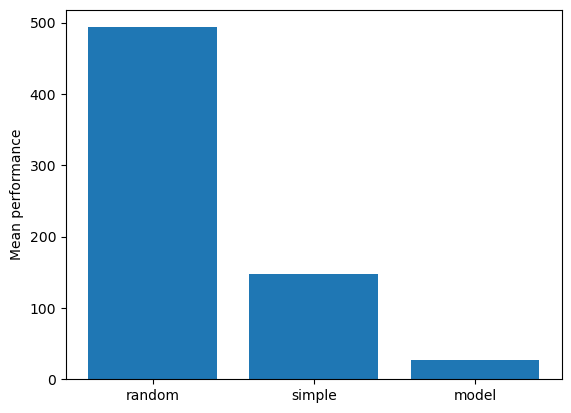



Average number of cleans, -1 representing failed to finish in 10,000 or 100,000 for the 100x100
      size  Randomized Agent  Simple Reflex Agent  Model Reflex Agent
0      5x5            126.39                12.15               12.38
1    10x10            891.13                61.82               62.98
2  100x100             -1.00                -1.00             5055.45


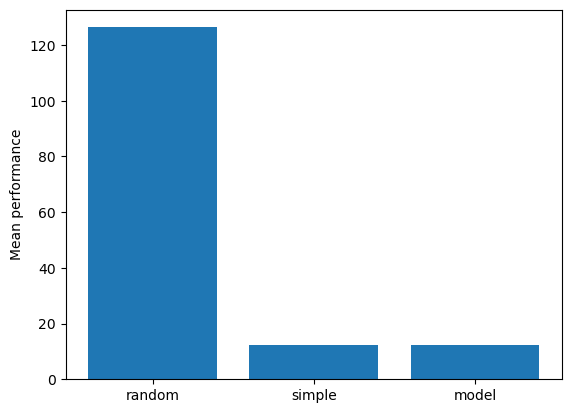



Average number of actions, -1 representing failed to finish in 10,000 or 100,000 for the 100x100
      size  Randomized Agent  Simple Reflex Agent  Model Reflex Agent
0      5x5           309.885               80.170               19.44
1    10x10          2221.675              617.425               98.00
2  100x100            -1.000               -1.000            15277.99


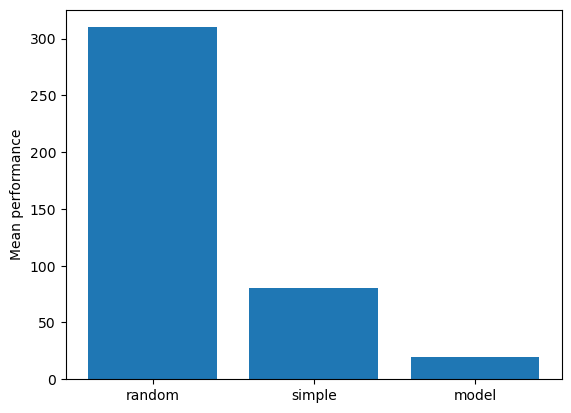

In [107]:
# Your graphs and discussion of the results goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cols = ["size","Randomized Agent","Simple Reflex Agent","Model Reflex Agent"]

runtime = [["5x5",varDict["random"][0][0],varDict["simple"][0][0],varDict["model"][0][0]],["10x10",varDict["random"][1][0],varDict["simple"][1][0],varDict["model"][1][0]],["100x100",varDict["random"][2][0],varDict["simple"][2][0],varDict["model"][2][0]]]


print("Average number of steps, -1 representing failed to finish in 10,000 or 100,000 for the 100x100")

df = pd.DataFrame(runtime,columns = cols)
print(df)

vals = [varDict["random"][0][0],varDict["simple"][0][0],varDict["model"][0][0]]
plt.bar(varDict.keys(), vals)
plt.ylabel("Mean performance")
plt.show()
print("\n")
print("Average number of cleans, -1 representing failed to finish in 10,000 or 100,000 for the 100x100")
runtime = [["5x5",varDict["random"][0][1],varDict["simple"][0][1],varDict["model"][0][1]],["10x10",varDict["random"][1][1],varDict["simple"][1][1],varDict["model"][1][1]],["100x100",varDict["random"][2][1],varDict["simple"][2][1],varDict["model"][2][1]]]
df = pd.DataFrame(runtime,columns = cols)
print(df)

vals = [varDict["random"][0][1],varDict["simple"][0][1],varDict["model"][0][1]]
plt.bar(varDict.keys(), vals)
plt.ylabel("Mean performance")
plt.show()

print("\n")
print("Average number of actions, -1 representing failed to finish in 10,000 or 100,000 for the 100x100")
runtime = [["5x5",(varDict["random"][0][0]+varDict["random"][0][1])/2,(varDict["simple"][0][0]+varDict["simple"][0][1])/2,(varDict["model"][0][0]+varDict["model"][0][1])/2],["10x10",(varDict["random"][1][0]+varDict["random"][1][1])/2,(varDict["simple"][1][0]+varDict["simple"][1][1])/2,(varDict["model"][1][0]+varDict["model"][1][1])/2],["100x100",(varDict["random"][2][0]+varDict["random"][2][1])/2,(varDict["simple"][2][0]+varDict["simple"][2][1])/2,(varDict["model"][2][0]+varDict["model"][2][1])]]
df = pd.DataFrame(runtime,columns = cols)
print(df)


vals = [(varDict["random"][0][0]+varDict["random"][0][1])/2,(varDict["simple"][0][0]+varDict["simple"][0][1])/2,(varDict["model"][0][0]+varDict["model"][0][1])/2]
plt.bar(varDict.keys(), vals)
plt.ylabel("Mean performance")
plt.show()

##General Notes about robots
The Graphs are chosen for the 5x5 grid, because the most the most consistent results are found
The model based agent preforms the best given the square room, with the simple agent following, and the random agent trailing much behind.

The areas on the table listed as -1 are areas where the robot did not finish given 10,000 battery and 100,000 battery on the 100x100. The numbers 10,000 and 100,000 were chosen because it allowed the largest number of datapoints

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [108]:
# Answers goes here
#If put into a rectangular room with an unknown size, any of the agents will be able to complete it, however the model based would do it the best

#If the cleaning area had an irregular shape, the model based would most likely not be able to complete it; as it assumes it is a square. However, the simple reflex agent would most likely be able to complete it because it randomly chooses a direction. While it would take a really long time it should be able to complete it

#If the room contained obstacles, it would have similar results to an irregularly shaped room. The model based would not fully clean it, as it would miss areas where the obstacles are. The simple reflex agent, however, would most likely complete it, given enough time

#If the dirt sensor is not perfect, the model sensor would possibly be able to clean the floor, depending on when the dirt sensor fails, once it reaches the end, it would be unable to go back if it did not complete the task. The simple reflex, on the other hand, does not have a set path, but randomly drives until the environment tells the agent it is clean

#if the bump sensor is not perfect all of the agents could fail and fall off the edge. If the wall sensor triggers too early the model based will fail, but the simple reflex will be able to complete it given enough time.



## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [109]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [110]:
# Your ideas/code
import os

os.system('jupyter nbconvert --to html robot_vacuum.ipynb')

[NbConvertApp] Converting notebook robot_vacuum.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 423902 bytes to robot_vacuum.html


0